# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: cinay chandra reddy
Roll Number:2020101010

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [143]:
import csv
import random
import numpy as np

In [144]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

for i in range(len(x_train)):
    x_train[i].append(1)
for i in range(len(x_test)):
    x_test[i].append(1)
x_train=np.array(x_train)
y_test=np.array(y_test)
x_test=np.array(x_test)
y_train=np.array(y_train)
# print(x_test)

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

we have 4 independent variables so we will have 5 parameters which need to be adjusted using the gradient decent algorithm by the use of loss function first we initilise the parameters to 0 then we will calculate the gradient and will adjust the parameter vector using the gradient as  new = old - a * gradient  we will continue till some number of iterations or untill there is very less decrease of loss function after this we are left with the parameters required then we will use these parameters to estimate the output values and will calculate the final mean square error

<!-- your answer to 1.1.1 -->

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [145]:
# implement Linear Regression

para=np.full((5),0,dtype=float)
a=0.01
lnow=0
sum=0
# print(len(x_train))
for i in range(len(x_train)):
    sum=sum+((np.dot(para,x_train[i],out=None))-y_train[i])**2
sum=sum*(1/len(x_train))
lprev=sum
f=0
while(f<100000):
    sum=0
    for i in range(len(x_train)):
        sum=sum+x_train[i]*(np.sum(np.dot(para,x_train[i],out=None))-y_train[i])
    sum=sum*(1/len(x_train))
    dnow=sum
    sum=0
    for i in range(len(x_train)):
        sum=sum+((np.dot(para,x_train[i],out=None))-y_train[i])**2
    sum=sum*(1/len(x_train))
    lnow=sum
    if((lnow)<=(lprev)):
        para=para-a*dnow
        lprev=lnow
    else:
        break
    f=f+1


y_pred=np.full(len(y_test),0,dtype=float)

for i in range(len(y_test)):
    y_pred[i]=np.sum(np.dot(x_test[i],para))

print(para)
sum=0
for i in range(len(x_test)):
    sum=sum+((np.dot(para,x_test[i],out=None))-y_test[i])*((np.dot(para,x_test[i],out=None))-y_test[i])
sum=sum*(1/len(x_test))
lnow=sum
print(lnow)

# from sklearn import linear_model

# x=linear_model.LinearRegression()

# x.fit(x_train,y_train)

# print(x.coef_)
# y_pred=x.predict(x_test)








[-0.01322621 -0.12661986  1.52455339  0.62359001  1.61017154]
0.005482775681873623


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

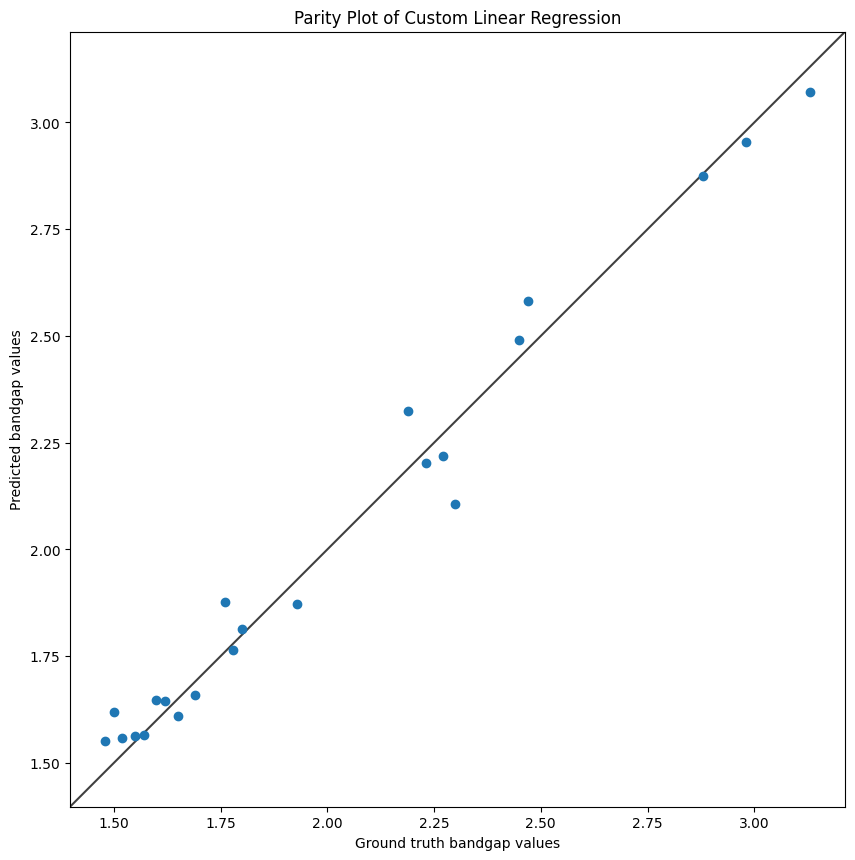

In [149]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

A Ridge regressor is basically a regularized version of a Linear Regressor. i.e to the original cost function of linear regressor we add a regularized term that forces the learning algorithm to fit the data and helps to keep the weights lower as possible

<!-- Your answer to 1.2.1 -->

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

answer) alpha controls the regularization of the model i.e helps in reducing the variance of the estimates. as we can see from beow that the lower the value of alpha the greather is the score and the rsme increases as we increase the value of alpha

In [160]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Lasso,Ridge
for i in range(1,100,5):
    model = Ridge(alpha = i/100, random_state = 42)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    xyy=model.predict(x_test)
    sq=(np.sum(np.square(xyy-y_test)))*(1/len(y_test))**.5
    print(i/100," ",score," ",sq)
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

0.01   0.9779325431303051   0.025845955383833046
0.06   0.9773037512057762   0.02658241215468132
0.11   0.9765547788028253   0.027459627296629825
0.16   0.9756940914838915   0.028467685731996734
0.21   0.9747295510040027   0.029597379577386902
0.26   0.9736684633454546   0.030840151884277956
0.31   0.972517622471212   0.032188045393947234
0.36   0.9712833502211277   0.033633655810025156
0.41   0.9699715327288336   0.03517008914612587
0.46   0.9685876536964125   0.03679092275372195
0.51   0.9671368248280127   0.03849016967753647
0.56   0.9656238136917976   0.04026224602293361
0.61   0.96405306925151   0.04210194105271425
0.66   0.9624287452840216   0.044004389759898656
0.71   0.9607547218771292   0.04596504768897105
0.76   0.959034625182222   0.04797966780106488
0.81   0.9572718455789626   0.05004427919903443
0.86   0.955469554393565   0.05215516754659179
0.91   0.9536307192983607   0.05430885703195079
0.96   0.9517581185079489   0.05650209374094294


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso stands for least absolute shrinkage and selection operator. it can be used to perform linear regression while also reducing the number of features used in the model 

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [168]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
for i in range(1,100,5):
    lasso = Lasso(alpha=i/100)

    lasso.fit(x_train, y_train)
    xyy=lasso.predict(x_test)

    lasso.score(x_test, y_test)
    sq=(np.sum(np.square(xyy-y_test)))*(1/len(y_test))**0.5
    print(i/100," ",score," ",sq)

0.01   0.9517581185079489   0.05080081898424266
0.06   0.9517581185079489   0.6009603368679766
0.11   0.9517581185079489   1.2017119839130987
0.16   0.9517581185079489   1.2017119839130987
0.21   0.9517581185079489   1.2017119839130987
0.26   0.9517581185079489   1.2017119839130987
0.31   0.9517581185079489   1.2017119839130987
0.36   0.9517581185079489   1.2017119839130987
0.41   0.9517581185079489   1.2017119839130987
0.46   0.9517581185079489   1.2017119839130987
0.51   0.9517581185079489   1.2017119839130987
0.56   0.9517581185079489   1.2017119839130987
0.61   0.9517581185079489   1.2017119839130987
0.66   0.9517581185079489   1.2017119839130987
0.71   0.9517581185079489   1.2017119839130987
0.76   0.9517581185079489   1.2017119839130987
0.81   0.9517581185079489   1.2017119839130987
0.86   0.9517581185079489   1.2017119839130987
0.91   0.9517581185079489   1.2017119839130987
0.96   0.9517581185079489   1.2017119839130987
